# PC Lab 2: Data Preprocessing and Nearest Neighbors
---

## 1. Nearest neighbor algorithm for classification

### Introduction

<img src="https://www.postnetwork.co/wp-content/uploads/2022/11/irishflowerrs.png" width=600>

### Classification problem

In the previous lab session, the iris flower data set was explored. Imagine now the case that for a 
new iris flower, we know its respective characteristics (sepal and petal length?height, respectively),
but do not know its species. A natural task would be to assign the flower to one of the three possible species, based on its characteristics (features). This task (or problem) is called a 
<strong> classification problem. </strong> In this practical session, an algorithm is considered by looking at the closest training examples in the (labeled) dataset, called nearest neighbour classification.

### Dataset
In the iris flower dataset (iris120.csv), each instance (i.e. flower) is described by 5 attributes:\
sepal length, sepal width, petal length, petal width and species.
For the matter of simplicity, we will only use the species, sepal length and sepal width. \
\
These properties can be seen as _variables_, and for a given flower, each of these variables takes a specific
value. In a classification setting, the aim is to predict the value of one of the variables (here the species), based on the value of the other variables (here sepal width and length). The variable of which the values have to be predicted is called the _output variable_ and the variables used to make this prediction are called the _input variables_ or _features_. \
\
A dataset $\mathcal{D}$ consists of a set of $n$ observations of input-output couples $(\boldsymbol{x_i}, y_i)$, where $i \in \{1, \dots, n \}$. Here, $\boldsymbol{x_i} = (x_{i1}, \dots, x_{ip}))^T \in \mathbb{R}^p$
are the observed values for the features (with $p$ the number of features), and $y_i$ are the observed output values, such that a training dataset $\mathcal{D}_{train}$ with $n$ instances can be written as
$$\mathcal{D}_{train} = \{ (\boldsymbol{x_1}, y_1), \dots, (\boldsymbol{x_n}, y_n) \}. $$ 

### Model and problem setup
Using the dataset, the goal is to build a _model_ $f$ that is able to predict the value of the output variable, given the value of the input variables. \
In our iris classification problem, both input variables take real values ($x_i \in \mathbb{R}^2$ for $i \in \{1, \dots, n \}$), whereas the output variable is nominal, taking values from the finite set $\{setosa, versicolor, virginica\}$. Hence, the model $f$ we are looking for is a mapping $$f: \mathbb{R}^2 \rightarrow \{setosa, versicolor, virginica\}.$$

### Nearest neighbour classification

A very simple technique to derive a classifier model from a given training dataset is the _nearest neighbour algorithm_. It departs from the assumption that instances whose features are highly similar are more likely to have the same label than those with very different features.\
In particular, the _k-nearest neighbors algorithm_ for classification classifies an instance by a plurality vote of its $k$ closest neighbours. If $k=1$, the model applies this idea in its most extreme form: the label is predicted as the label of the closest instance in the training dataset.\
\
In order to select the 'closest' instances in the training set, a suitable measure of distance $d(x_i, x_j)$ between two instances $x_i$ and $x_j$ is used. In our case, we will simply use the Euclidean distance:
$$ d_E (x_i, x_j) = \sqrt{\sum_{k=1}^p (x_{i,k} - x_{j,k})^2}.$$

Using this distance measure, the ($1$-) nearest neighbor algorithm consists of the following steps: 
1. For an instance with unknown label and known feature vector $\boldsymbol{x}$, calculate the distance to each instance in the dataset: $d_E(\boldsymbol{x}, \boldsymbol{x_i})$ where $i = 1, ... ,n.$
2. Select the closest instance and take its label as the prediction for the unknown label.



The following code snippet downloads all necessary files for this pc-lab:

In [1]:
!wget https://raw.githubusercontent.com/tfmortie/mlmust/main/02_knn/abalone.csv 
!wget https://raw.githubusercontent.com/tfmortie/mlmust/main/02_knn/iris120.csv 
!wget https://raw.githubusercontent.com/tfmortie/mlmust/main/02_knn/irisNA.csv 

--2024-01-26 15:36:25--  https://raw.githubusercontent.com/tfmortie/mlmust/main/02_knn/abalone.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32955 (32K) [text/plain]
Saving to: ‘abalone.csv.1’

abalone.csv.1       100%[===================>]  32,18K  --.-KB/s    in 0,002s  

2024-01-26 15:36:25 (20,7 MB/s) - ‘abalone.csv.1’ saved [32955/32955]

--2024-01-26 15:36:25--  https://raw.githubusercontent.com/tfmortie/mlmust/main/02_knn/iris120.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3359 (3,3K) [text/plain]
Saving to: ‘

<div class="alert alert-success">

<b>EXERCISE 1.1</b>: **Load the dataset iris120.csv in to the memory and select the columns 'Sepal.Length', 'Sepal.Width', and 'Species'. Additionally, load the set of unclassified
instances (irisNA.csv) and select the same columns. Both datasets should be loaded as Pandas dataframes.**
</div>



In [2]:
import numpy as np
import pandas as pd

cols = ['Sepal.Length', 'Sepal.Width', 'Species']
# load the two datasets and select the respective columns

# iris120 as the training set
iris120 = pd.read_csv("iris120.csv")
iris120 = iris120.loc[:, cols]

# irisNA as the test set
irisNA = pd.read_csv("irisNA.csv")
irisNA = irisNA.loc[:, cols]


In [3]:
iris120.head()

,Sepal.Length,Sepal.Width,Species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [4]:
irisNA.head()

,Sepal.Length,Sepal.Width,Species
0,5.4,3.9,NaN
1,5.0,3.4,NaN
2,5.8,4.0,NaN
3,5.4,3.9,NaN
4,4.4,3.0,NaN


<div class="alert alert-success">

<b>EXERCISE 1.2</b>: **Implement the nearest neighbour algorithm (as explained above) for the iris problem in a function called nn_iris_predict.
Use this function to predict the species of unknown flowers in the dataset irisNA.csv. Make sure
your function has the structure given below. \
(Here, _new_obs_features_ is an array or dataframe containing the two features for one specific new instance, and _train_dataset_ is the dataframe containing the features and labels (i.e. _iris120_ as initialized above)).**
</div>

In [5]:
def nn_iris_predict(new_obs_features, train_dataset):

    # extract features (i.e. first two columns) from training dataset to calculate the distances
    train_features = train_dataset.iloc[:, :2]

    # extract species (labels) of training dataset in a separate variable
    train_labels = train_dataset.iloc[:, 2]

    # create a variable 'dist_euc' which is an array containing the euclidean distance of
    # the new instance to all instances (rows) in the training data set
    dist_euc = ((train_features - new_obs_features) ** 2).sum(axis=1) ** .5

    # extract index of nearest neighbor (i.e. the index of the smallest value in the array 'dist_euc')
    nn_ind = np.argmin(dist_euc)

    # extract species label on the respective index
    nn_label = train_labels.iloc[nn_ind]

    return nn_label


Now test the algorithm to predict the species of the first instance of the unknown flowers dataset irisNA.csv.

In [6]:
# extract features of the first instance in the test set
new_obs_features = irisNA.iloc[0, :2]

# predict the species of the first instance in the test set
nn_iris_predict(new_obs_features, iris120)

'setosa'

## 2. Nearest neighbor algorithm for regression
In the previous section, the output $y$ was a nominal variable (i.e. one specific class from a discrete set of possible classes). When the output is real-valued ($y \in \mathbb{R}$), the prediction problem is called a _regression problem_. \
\
As with nominal outputs, the nearest neighbor algorithm can also be applied in this case. It is identical to the one used in the classification task, where the predicted label now is the real-valued label of the instance closest in the training dataset.

### Data preprocessing
For solving the next task, some more elementary data preprocessing steps need to be introduced.

#### Dummy encoding of nominal variables 
Often, the features in a dataset are not numerical, but nominal or ordinal. In this case, to be still able to use algorithms relying on numerical values such as the nearest neighbor algorithm, we can use _dummy encodings_ for each nominal variable.\
\
In dummy encodings, a variable (feature) $x^i$ that can take $k$ possible (nominal) values is replaced by $k$ new binary variables (features). As an example, consider a dataset where one feature (i.e. $x^1$) displays the weather status, taking the $3$ possible values $\{Sunny, Overcast, Rainy\}$. Each of these values can be represented by a dummy variable: $x^{1a}$, $x^{1b}$ and $x^{1c}$, with values 

$$\begin{equation*}
x^{1a} = \begin{cases} 1,\quad if \quad x^1 = "Sunny" \\
                     0, \quad otherwise \end{cases}
\end{equation*}$$

$$\begin{equation*}
x^{1b} = \begin{cases} 1,\quad if \quad x^1 = "Overcast" \\
                     0, \quad otherwise \end{cases}
\end{equation*}$$

$$\begin{equation*}
x^{1c} = \begin{cases} 1,\quad if \quad x^1 = "Rainy" \\
                     0, \quad otherwise \end{cases}
\end{equation*}$$

For this exercise, we will look at the task of predicting the age of abalone, a type of marine snail.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/LivingAbalone.JPG/2560px-LivingAbalone.JPG" width=500>

The dataset _abalone.csv_ contains measurements of physical properties of several abalone specimen. By using these physical properties, the aim is to build a predictive model for the age of these animals (more information concerning this dataset can be found in [abalone.info](https://archive.ics.uci.edu/ml/datasets/Abalone)). In the following example, we replace the nominal variable 'sex' by three dummy variables (i.e. as many as the values it takes). This can be done by using one of several functions that are provided in Python, such as the [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) function from Pandas, or the [OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function from Scikit-learn. First, we create the dummy variables, then we concatenate them with the original dataset and finally we remove the original variable form the dataset.

In [7]:
# read abalone dataset as pandas dataframe
abalone = pd.read_csv("abalone.csv")
print(abalone.head())

  sex  length  diameter  height  wholeWeight  shuckedWeight  visceraWeight  \
0   I   0.665     0.500   0.170       1.2975         0.6035         0.2910   
1   F   0.460     0.365   0.115       0.4485         0.1650         0.0830   
2   F   0.560     0.445   0.180       0.9030         0.3575         0.2045   
3   I   0.395     0.300   0.090       0.2790         0.1340         0.0490   
4   I   0.530     0.400   0.145       0.5550         0.1935         0.1305   

   shellWeight  age  
0       0.3595    9  
1       0.1700   14  
2       0.2950    9  
3       0.0750    8  
4       0.1950    9  


In [8]:
# create dummy variables for the "sex" feature
dummies = pd.get_dummies(abalone.sex)
print(dummies.head())

   F  I  M
0  0  1  0
1  1  0  0
2  1  0  0
3  0  1  0
4  0  1  0


In [9]:
# concatenate the dummy variables to the original dataframe
abalone_dummy_encoded = pd.concat([abalone, dummies], axis=1)
# remove the original 'sex' column
abalone_dummy_encoded = abalone_dummy_encoded.drop(['sex'], axis=1)
print(abalone_dummy_encoded.head())

   length  diameter  height  wholeWeight  shuckedWeight  visceraWeight  \
0   0.665     0.500   0.170       1.2975         0.6035         0.2910   
1   0.460     0.365   0.115       0.4485         0.1650         0.0830   
2   0.560     0.445   0.180       0.9030         0.3575         0.2045   
3   0.395     0.300   0.090       0.2790         0.1340         0.0490   
4   0.530     0.400   0.145       0.5550         0.1935         0.1305   

   shellWeight  age  F  I  M  
0       0.3595    9  0  1  0  
1       0.1700   14  1  0  0  
2       0.2950    9  1  0  0  
3       0.0750    8  0  1  0  
4       0.1950    9  0  1  0  


### Standardizing the data
In realistic datasets, most features have different means and standard deviations. For the nearest
neighbour algorithm, it can easily be seen that features with a high standard deviation will be more
influential than features with a lower standard deviation. In most cases, this is unwanted since it
is not known in advance which features are most important. To overcome this problem, features
are often _standardized_, a scaling method where the values are centered around the (sample) mean with a unit standard deviation.\
The standardized version of a feature $x^i$ can be obtained as   
$$ x^{i'} = \frac{x^i - \mu_i}{\sigma_i},$$    
where $\mu_i$ and $\sigma_i$ represent the sample mean and standard deviation of $\boldsymbol{x^i}$.
The [Scaler()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function of Scikit-learn can be used to perform this standardization.

Notice that what we're doing here (ie. scaling the training and test set together in one operation) is usually considered bad practice as it will leak data from test to train and hence bias model evaluation.

In [10]:
from sklearn.preprocessing import scale

# split abalone_dummy_encoded into features and labels
y = abalone_dummy_encoded['age'].values # keep target variable
X = abalone_dummy_encoded.drop(['age'], axis=1) # remove it from the features

# scale the features: will return a numpy array
X = scale(X)

### Data splitting and prediction quality

In order to test the performance of a nearest neighbor model, one can split a dataset in a training $\mathcal{D}_{train}$ and test set $\mathcal{D}_{test}$. The training set is used to train a model and the test set is used to evaluate its performance. For a regression problem, one typically uses the _mean squared error_ (MSE) to evaluate the quality of the model. For any dataset $\mathcal{D}$, it is calculated as follows:
$$ \text{MSE} = \frac{1}{|\mathcal{D} |} \sum_{\boldsymbol{x_i} \in \mathcal{D}}(f(\boldsymbol{x_i}) - y_i)^2$$
The metric above can be computed for the training set and test set (if labels are available) for comparison.


<div class="alert alert-success">

<b>EXERCISE 2.1</b>: **To prepare the dataset for the following exercise, split the dataset in a training set (80% of the data) and test set (20% of the data). See the documentation of the function [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).**
</div>

In [11]:
from sklearn.model_selection import train_test_split

# name the variables for train/test features and labels X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. K-nearest neighbors for regression

Classifying an instance only by the (one) nearest neighbor to it might not always be very accurate. Hence, a simple extension of the nearest neighbor algorithm consists of taking not only one, but multiple neighbors into account.

To this end, let $N_k(\boldsymbol{x}) \subset \mathcal{D}$ be the $k$ nearest neighbors of an instance with feature vector $\boldsymbol{x}$.

For __classification__:
- set $f(\boldsymbol{x})$ to be the _majority vote_ of its neighbors, i.e. the label that occurs most often in $N_k(\boldsymbol{x})$

For __regression__:
- set $f(\boldsymbol{x})$ to be the _average_ of $N_k(\boldsymbol{x})$, i.e. $$ f(\boldsymbol{x}) = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i.$$

### K-nearest neighbors in Python

As with the $1$-nearest neighbor algorithm, it is possible to implement a version of the k-nearest neighbors algorithm in Python from scratch. However, to simplify things, an alternative is to use a pre-implemented version of the algorithm. Here, we use the [Scikit-learn](http://scikit-learn.org/stable/) library again, which has an implementation of 
the $k$-nearest neighbor algorithm availbale. You can load and see more info about the usage of this function by going to the [documentation page](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) or by running the following code:

In [12]:
from sklearn import neighbors
help(neighbors.KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |      

As you can see in the help window, in Scikit-learn, an estimator for classification/regression is a _Python object_ that implements the methods _fit(X, y)_ and _predict(T)_.

The constructor of an estimator takes as arguments the parameters of the model (in our case the basic parameters are the number of neighbours and the distance metric) and is used to instantiate an object. Here, we set the number of neighbors to $k=5$.

In [13]:
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, metric='euclidean')


We call our estimator instance `knn`. It now must be fitted to the data, that is, it must learn from the data. This is done by passing our training set to the fit method.

In [14]:
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean')

After the estimator is fitted to the training data, the estimator can be used to predict the age of the first example in our test dataset. Remember, this is done by comparing the features of the first example to the features of all training samples, followed by determining the closest neighbors. The prediction is then obtained by averaging the age of the neighbors.

In [15]:
y_pred_1 = knn.predict(X_test[0].reshape(1,-1))
y_pred_1

array([11.2])

Next, we can calculate the mean squared error of the prediction by manual calculation or by using the [mean_squared_error()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function in Scikit-learn. 

In [16]:
from sklearn.metrics import mean_squared_error
print(y_test[0], y_pred_1)
print(mean_squared_error(y_pred_1, y_test[0].reshape(1, -1)))

10 [11.2]
1.4399999999999984


<div class="alert alert-success">

<b>EXERCISE 3.1</b>: **Build a 3-nearest neighbors regressor in a similar manner as before. Predict the age for all training samples and test samples and compute the mean squared error. Compare the training and test error.**
</div>

In [17]:
# now use k=3 neighbors for training
n_neighbors = 3
# Instantiate the knn object
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, metric='euclidean')
# Fit
knn.fit(X_train, y_train)
# Predict train
y_pred_train = knn.predict(X_train)
# Predict test
y_pred_test = knn.predict(X_test)
# print MSE train
print(mean_squared_error(y_pred_train, y_train))
# print MSE test
print(mean_squared_error(y_pred_test, y_test))

3.706746031746032
6.534126984126983


Note that $k$ in the $k$-nearest neighbors algorithm is called a hyperparameter. A parameter of that kind is typically choosen by the user (i.e. it is not learned) and depends on the prediction task and dataset. This is illustrated in the next exercise. 

<div class="alert alert-success">

<b>EXERCISE 3.2</b>: **Repeat the previous exercise by considering different values for $k$. You can consider a range between 1 and 50 and a step size of 3. For each $k$, calculate and plot the training and test error of the resulting model.**
</div>

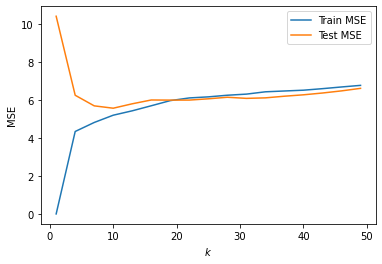

In [18]:
# use lists to store the results obtained from every iteration
results_train = []
results_test = [] 
for i in range(1, 50, 3):
    # instantiate the model
    knn = neighbors.KNeighborsRegressor(n_neighbors=i, metric='euclidean')
    # Fit
    knn.fit(X_train, y_train)
    # Predict train
    y_pred_train = knn.predict(X_train)
    # Predict test
    y_pred_test = knn.predict(X_test)
    # calculate and store the MSE train
    mse_train = mean_squared_error(y_pred_train, y_train)
    results_train.append(mse_train)
    # calculate and store MSE test
    mse_test = mean_squared_error(y_pred_test, y_test)
    results_test.append(mse_test)

import matplotlib.pyplot as plt

plt.plot(range(1, 50, 3), results_train) # training MSEs
plt.plot(range(1, 50, 3), results_test) # test MSEs
plt.ylabel('MSE')
plt.xlabel('$k$')
plt.legend(['Train MSE', 'Test MSE'])